<a href="https://colab.research.google.com/github/Omar-Ouardighi/Economic-Well-Being-Prediction-Challenge/blob/main/Economic_Well_Being_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing Libraries & Packages 📚 



In [1]:
pip install catboost

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor


# Importing & Reading the dataset 📝 

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub = pd.read_csv('/content/SampleSubmission.csv')

train.shape, test.shape

((21454, 19), (7194, 18))

In [4]:
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,21454.0,2010.060874,4.799579,1994.000000,2008.000000,2011.000000,2014.000000,2016.000000
ghsl_water_surface,21454.0,0.028259,0.097490,0.000000,0.000000,0.000000,0.000000,0.969956
ghsl_built_pre_1975,21454.0,0.038222,0.113562,0.000000,0.000000,0.000198,0.007987,0.877116
ghsl_built_1975_to_1990,21454.0,0.028644,0.077367,0.000000,0.000000,0.000709,0.009868,0.685010
ghsl_built_1990_to_2000,21454.0,0.012689,0.032745,0.000000,0.000043,0.001001,0.008128,0.515534
ghsl_built_2000_to_2014,21454.0,0.018386,0.040421,0.000000,0.000124,0.001871,0.014936,0.649159
ghsl_not_built_up,21454.0,0.873800,0.239294,0.000859,0.897867,0.991919,0.999532,1.000000
ghsl_pop_density,21454.0,95.756775,209.704761,0.000000,3.848533,17.632672,63.225683,1741.256516
landcover_crops_fraction,21454.0,21.034265,16.751106,0.000000,5.610515,18.509291,33.590293,80.064918
landcover_urban_fraction,21454.0,13.999061,23.715485,0.000000,0.798841,2.770159,12.621501,98.784092


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       21454 non-null  object 
 1   country                                  21454 non-null  object 
 2   year                                     21454 non-null  int64  
 3   urban_or_rural                           21454 non-null  object 
 4   ghsl_water_surface                       21454 non-null  float64
 5   ghsl_built_pre_1975                      21454 non-null  float64
 6   ghsl_built_1975_to_1990                  21454 non-null  float64
 7   ghsl_built_1990_to_2000                  21454 non-null  float64
 8   ghsl_built_2000_to_2014                  21454 non-null  float64
 9   ghsl_not_built_up                        21454 non-null  float64
 10  ghsl_pop_density                         21454

In [7]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7194.0,2010.899778,3.651409,1998.000000,2010.000000,2011.000000,2014.000000,2016.000000
ghsl_water_surface,7194.0,0.023317,0.087915,0.000000,0.000000,0.000000,0.000000,0.991100
ghsl_built_pre_1975,7194.0,0.049325,0.132582,0.000000,0.000000,0.000089,0.008020,0.894608
ghsl_built_1975_to_1990,7194.0,0.025364,0.057233,0.000000,0.000000,0.000320,0.010774,0.506349
ghsl_built_1990_to_2000,7194.0,0.016767,0.038079,0.000000,0.000019,0.000720,0.012036,0.275297
ghsl_built_2000_to_2014,7194.0,0.018319,0.039703,0.000000,0.000075,0.001359,0.015915,0.359931
ghsl_not_built_up,7194.0,0.866908,0.252557,0.008900,0.889836,0.994922,0.999738,1.000000
ghsl_pop_density,7194.0,93.147365,211.196451,0.000000,1.071279,12.290615,66.695301,1902.876955
landcover_crops_fraction,7194.0,21.285033,14.916804,0.000000,7.855023,21.105082,31.998608,74.401875
landcover_urban_fraction,7194.0,14.318006,24.510227,0.000000,0.459067,2.087011,14.174194,97.210607


# Exploration Data Analysis




In [8]:
train.isna().sum()

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

In [9]:
test.isna().sum()

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
dtype: int64

In [10]:
train['country'].value_counts()

Nigeria                     2695
Kenya                       2626
Tanzania                    2450
Malawi                      1957
Ethiopia                    1721
Ghana                       1419
Mali                        1295
Cameroon                    1041
Rwanda                       984
Senegal                      903
Mozambique                   879
Lesotho                      794
Sierra Leone                 785
Guinea                       593
Cote d'Ivoire                481
Togo                         330
Swaziland                    270
Central African Republic     231
Name: country, dtype: int64

In [11]:
test['country'].value_counts()

Uganda                          1584
Zimbabwe                        1189
Zambia                          1038
Burkina Faso                     997
Angola                           855
Democratic Republic of Congo     785
Benin                            746
Name: country, dtype: int64

In [12]:
# Finding correlation
correlations_data = train.corr()['Target'].sort_values()
correlations_data

ghsl_not_built_up                         -0.580670
dist_to_shoreline                         -0.321828
landcover_crops_fraction                  -0.253550
dist_to_capital                           -0.235850
landcover_water_permanent_10km_fraction    0.017210
landcover_water_seasonal_10km_fraction     0.066462
year                                       0.115014
ghsl_water_surface                         0.182816
ghsl_built_1990_to_2000                    0.425059
ghsl_built_2000_to_2014                    0.429262
ghsl_built_pre_1975                        0.450119
ghsl_built_1975_to_1990                    0.500753
ghsl_pop_density                           0.525206
nighttime_lights                           0.550703
landcover_urban_fraction                   0.666768
Target                                     1.000000
Name: Target, dtype: float64

Text(0.5, 1.0, 'Features correlation')

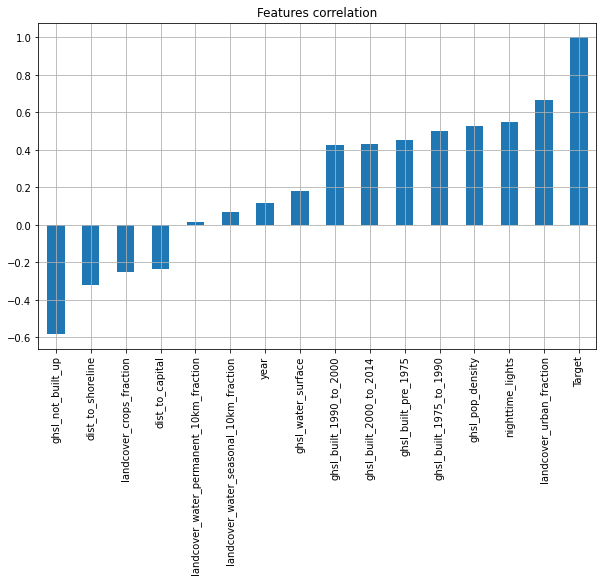

In [13]:
plt.figure(figsize=(10,6))
correlations_data.plot(kind='bar', grid=True)
plt.title('Features correlation')

# Data Preparation

In [14]:
# selecting input features
in_cols = list(train.columns[4:-1])
print('Input columns:', in_cols)

Input columns: ['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction', 'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction', 'landcover_water_seasonal_10km_fraction', 'nighttime_lights', 'dist_to_capital', 'dist_to_shoreline']


In [15]:
train['is_urban'] = (train['urban_or_rural'] == 'U').astype(int)
test['is_urban'] = (test['urban_or_rural'] == 'U').astype(int)

In [16]:
in_cols.append('is_urban')

#spliting the Data
X, y = train[in_cols], train['Target']
X_test = test[in_cols]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=58) # Random state keeps the split consistent
print(X_train.shape, X_val.shape)

(17163, 15) (4291, 15)


# Modeling



##XGBoost Regressor

I trained the model with best parameters after doing Randomized search.

the RMSE = 0.10387597065950029, there is still room for optimisation 


In [17]:

model= XGBRegressor(subsample= 0.9, min_child_weight= 1, max_depth=17, 
                    gamma= 0.05, eta= 0.025, colsample_bytree= 0.7,random_state=42)

model.fit(X_train,y_train)


[09:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.025, gamma=0.05,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=17, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [18]:
# The `squared=False` bit tells this function to return the ROOT mean squared error
mean_squared_error(y_val, model.predict(X_val), squared=False)

0.10387597065950029

##Hyperparameter tuning the XGBRegressor

In [19]:
xgb_params = {
    'eta' : [0.01,0.015, 0.025, 0.05, 0.1],
    'gamma' : [0.05,0.1,0.3,0.5,0.7,0.9,1.0],
    'max_depth': [3, 5, 7, 9, 12, 15, 17, 25],
    'min_child_weight':[1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

rs_xgb = RandomizedSearchCV(estimator=XGBRegressor(),param_distributions=xgb_params,
                            cv = 3, n_iter = 20, n_jobs=-1,
                           scoring='neg_mean_squared_error')
rs_xgb.fit(X,y)

print("\n The best score across ALL searched params:\n",
      np.sqrt(-rs_xgb.best_score_))

print("\n The best parameters across ALL searched params:\n",
      rs_xgb.best_params_)


KeyboardInterrupt: ignored

## CatBoostRegressor

catboost is doing better than XGBR with RMSE = 0.1025, without doing any hypeparameter tuning.




In [20]:
cat = CatBoostRegressor()
cat.fit(X_train,y_train, verbose=0 )

In [21]:
mean_squared_error(y_val, cat.predict(X_val), squared=False)

0.10258221870011036

## Hyperparameter Tuninig CatBoostRegressor
the best parameter found :
depth= 9, iterations = 97, learning_rate= 0.1

In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt  

parameters = {'depth'         : sp_randInt(4, 11),
                  'learning_rate' : sp_randFloat(),
                  'iterations'    : sp_randInt(10, 100)
                 }
randm = RandomizedSearchCV(estimator=CatBoostRegressor(), param_distributions = parameters, 
                               cv = 3, n_iter = 50, n_jobs=-1,
                           scoring='neg_mean_squared_error')
randm.fit(X, y)

# Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    

print("\n The best estimator across ALL searched params:\n",
      randm.best_estimator_)

print("\n The best score across ALL searched params:\n",
      np.sqrt(-randm.best_score_))

print("\n The best parameters across ALL searched params:\n",
      randm.best_params_)

print("\n ========================================================")

## RandomForestRegressor
after doing Randomized Search we found the best paramters and the score still worse than CatBoost.
RMSE =0.10300322393885476

In [22]:
rf = RandomForestRegressor( n_estimators= 300, min_samples_split= 10,
                           min_samples_leaf= 1,
                           max_features = 'log2', max_depth= 30,random_state=42)
rf.fit(X_train, y_train)
mean_squared_error(y_val, rf.predict(X_val), squared=False)

0.10300322393885476

# Training the models on all the data

In [23]:
#random forest
model1 = RandomForestRegressor(n_estimators= 300, min_samples_split= 10,
                           min_samples_leaf= 1,
                           max_features = 'log2', max_depth= 30, random_state=42)
model1.fit(X,y)
pred1 = model1.predict(X_test)

In [24]:
#CatBooost
model2 = CatBoostRegressor(random_state=42,
                           depth= 9, iterations = 97, learning_rate= 0.1)
model2.fit(X,y)
pred2 = model2.predict(X_test)

0:	learn: 0.1823887	total: 35.3ms	remaining: 3.39s
1:	learn: 0.1715099	total: 63.3ms	remaining: 3s
2:	learn: 0.1622356	total: 92.5ms	remaining: 2.9s
3:	learn: 0.1541051	total: 121ms	remaining: 2.81s
4:	learn: 0.1472003	total: 149ms	remaining: 2.74s
5:	learn: 0.1411334	total: 177ms	remaining: 2.68s
6:	learn: 0.1359122	total: 205ms	remaining: 2.64s
7:	learn: 0.1315396	total: 233ms	remaining: 2.59s
8:	learn: 0.1277240	total: 266ms	remaining: 2.6s
9:	learn: 0.1243679	total: 294ms	remaining: 2.56s
10:	learn: 0.1216143	total: 323ms	remaining: 2.52s
11:	learn: 0.1192169	total: 351ms	remaining: 2.48s
12:	learn: 0.1173772	total: 361ms	remaining: 2.33s
13:	learn: 0.1157563	total: 392ms	remaining: 2.33s
14:	learn: 0.1140453	total: 420ms	remaining: 2.29s
15:	learn: 0.1126675	total: 447ms	remaining: 2.26s
16:	learn: 0.1115681	total: 478ms	remaining: 2.25s
17:	learn: 0.1105798	total: 506ms	remaining: 2.22s
18:	learn: 0.1096316	total: 534ms	remaining: 2.19s
19:	learn: 0.1088637	total: 561ms	remaining

In [25]:
#XGBoost
model3= XGBRegressor(subsample= 0.9, min_child_weight= 1, max_depth=17,
                     gamma= 0.05, eta= 0.025, colsample_bytree= 0.7,random_state=42)
model3.fit(X,y)
pred3 = model3.predict(X_test)

[09:33:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Submission 
I have done two submissions
  1. CatBoostRegressor() because it's doing better than the other models
  2. An Ensemble of the three models 

In [26]:
#catboost predictions
sub_cat = sub.copy()
sub_cat['Target'] = pred2
sub_cat.head()

,ID,Target
0,ID_AAcismbB,0.137495
1,ID_AAeBMsji,0.244239
2,ID_AAjFMjzy,0.593187
3,ID_AAmMOEEC,0.404894
4,ID_ABguzDxp,0.289453


In [27]:
#ensembled predictions
ensembled = 0.2*pred1+0.6*pred2+ 0.2*pred3
ensembled

array([0.14434033, 0.24177806, 0.6075078 , ..., 0.46744096, 0.16293374,
       0.37071965])

In [28]:
sub_ens = sub.copy()
sub_ens['Target'] = ensembled
sub_ens.head()

,ID,Target
0,ID_AAcismbB,0.144340
1,ID_AAeBMsji,0.241778
2,ID_AAjFMjzy,0.607508
3,ID_AAmMOEEC,0.401442
4,ID_ABguzDxp,0.288692


In [ ]:
sub_cat.to_csv('sub_cat.csv', index=False)
sub_ens.to_csv('sub_ens.csv', index=False)

